## 3.1 Gamma function plot

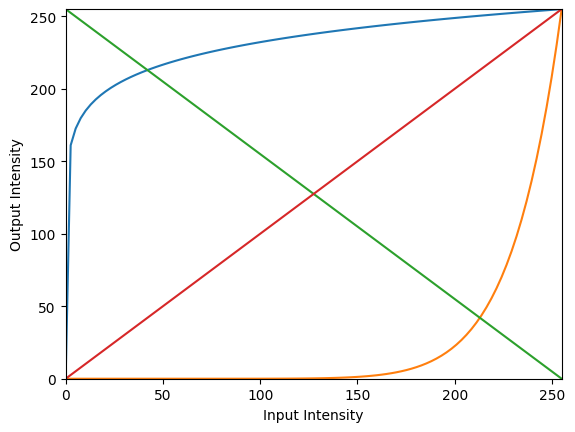

In [2]:
import numpy as np
import matplotlib.pyplot as plt

gamma1 = 0.1
gamma2 = 0.2
gamma3 = 0.5
gamma4 = 1.0
gamma5 = 2.0
gamma6 = 5.0
gamma7 = 10.0

c1 = 255.0 / ( 255.0 ** gamma1 )
c2 = 255.0 / ( 255.0 ** gamma2 )
c3 = 255.0 / ( 255.0 ** gamma3 )
c4 = 255.0 / ( 255.0 ** gamma4 )
c5 = 255.0 / ( 255.0 ** gamma5 )
c6 = 255.0 / ( 255.0 ** gamma6 )
c7 = 255.0 / ( 255.0 ** gamma7 )

x  = np.linspace( 0, 255, 100 )

y1 = x ** gamma1 * c1
y2 = x ** gamma2 * c2
y3 = x ** gamma3 * c3
y4 = x ** gamma4 * c4
y5 = x ** gamma5 * c5
y6 = x ** gamma6 * c6
y7 = x ** gamma7 * c7
y8 = 255 - x
y9 = x

#plt.plot( x, y1, x, y2, x, y3, x, y4, x, y5, x, y6, x, y7 )
plt.plot( x, y1, x, y7, x, y8, x, y9 )
plt.xlabel( "Input Intensity" )
plt.ylabel( "Output Intensity" )
plt.xlim( [0,255] )
plt.ylim( [0,255] )
plt.savefig('gamma.png')
plt.show( )


## <font color="Red">3.2 Gamma Correction </font>
<font color="Red">Please use for loop to calculate Gamma correction of an image.
<img src="Museum.bmp" width="300px" height="300px">original image
<img src="Museum_Gamma_0_1.bmp" width="300px" height="300px">Gamma: 0.1
<img src="Museum_Gamma_0_5.bmp" width="300px" height="300px">Gamma: 0.5
<img src="Museum_Gamma_2_0.bmp" width="300px" height="300px">Gamma: 2.0

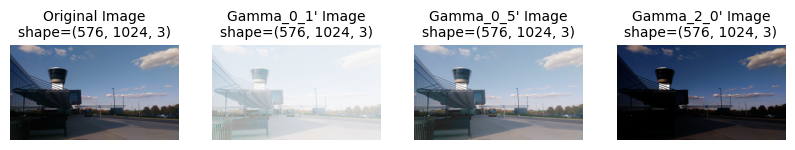

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def gamma_correction( f, gamma = 2.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    c =  255.0 / ( 255.0 ** gamma )
    table = np.zeros( 256 )
#-------------------- Code Here  -------------------#
    for i in range (256):
        table[i] = c * i ** gamma
    if f.ndim == 2:
        for i in range(nr):
            for j in range(nc):
                g[i,j] = table[f[i,j]]
    else:
        for i in range(nr):
            for j in range(nc):
                for k in range(3):
                    g[i,j,k] = table[f[i,j,k]]

#-------------------- Stop Here  -------------------#
    return g

def main( ):
    imgBGR = cv2.imread( "Museum.bmp", cv2.IMREAD_COLOR)
    img1 = imgBGR[:,:,::-1]
    img2 = gamma_correction( img1, 0.1 )
    img3 = gamma_correction( img1, 0.5 )
    img4 = gamma_correction( img1, 2.0 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Gamma_0_1' Image\nshape={}".format(img2.shape),
    "Gamma_0_5' Image\nshape={}".format(img3.shape),
    "Gamma_2_0' Image\nshape={}".format(img4.shape),
    ]
    display_img = [img1, img2, img3, img4]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])
main( )

## 3.3 Beta Function

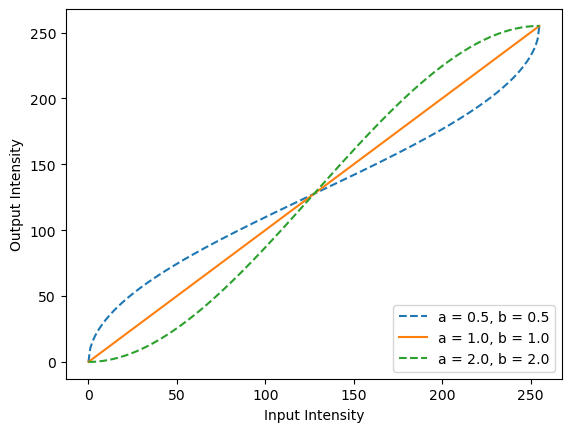

In [ ]:
import numpy as np
import cv2
import scipy.special as special
import matplotlib.pyplot as plt

x = np.linspace( 0, 1, 256 )
x1 = x * 255
y1 = special.betainc( 0.5, 0.5, x ) * 255
y2 = x1
y3 = special.betainc( 2.0, 2.0, x ) * 255

plt.plot( x1, y1, '--', label = 'a = 0.5, b = 0.5' )
plt.plot( x1, y2, '-',  label = 'a = 1.0, b = 1.0' )
plt.plot( x1, y3, '--', label = 'a = 2.0, b = 2.0' )
plt.xlabel( 'Input Intensity' )
plt.ylabel( 'Output Intensity' )
plt.legend( loc = 'lower right' )

plt.show( )

## <font color="Red">3.4 Beta Correction</font>
<font color="Red">Please use for loop to calculate Beta correction of an image.    
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.betainc.html">  special.betainc </a>

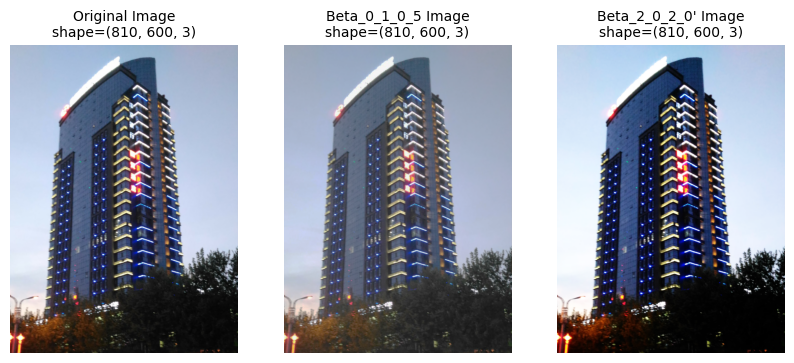

In [ ]:
import numpy as np
import cv2
import scipy.special as special
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def beta_correction( f, a = 2.0, b = 2.0 ):
#-------------------- Code Here  -------------------#
    g = f.copy( )
    nr, nc = f.shape[:2]
    table = np.zeros( 256 )
    c = 255.0 / ( 255.0 ** a )
    if f.ndim == 2:
        for i in range(256):
            table[i] = special.betainc( a, b, i / 255.0 ) * 255
        for i in range(nr):
            for j in range(nc):
                g[i, j] = table[f[i, j]]
    else:
        for i in range(256):
            table[i] = special.betainc( a, b, i / 255.0 ) * 255
        for i in range(nr):
            for j in range(nc):
                for k in range(3):
                    g[i, j, k] = table[f[i, j, k]]

    x = np.linspace( 0, 1, 256 )
    table = special.betainc( a, b, x ) * 255
#-------------------- Stop Here  -------------------#
    return g

def main( ):
    imgBGR = cv2.imread( "Building.bmp", cv2.IMREAD_COLOR)
    img1 = imgBGR[:,:,::-1]
    img2 = beta_correction( img1, a = 0.5, b = 0.5 )
    img3 = beta_correction( img1, a = 2.0, b = 2.0 )
#    cv2.imwrite( "Building_Beta_0_1_0_5.bmp", img1 )
#    cv2.imwrite( "Building_Beta_2_0_2_0.bmp", img2 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Beta_0_1_0_5 Image\nshape={}".format(img2.shape),
    "Beta_2_0_2_0' Image\nshape={}".format(img3.shape),
    ]
    display_img = [img1, img2, img3]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

## 3.5 Histogram    
指令：cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍)

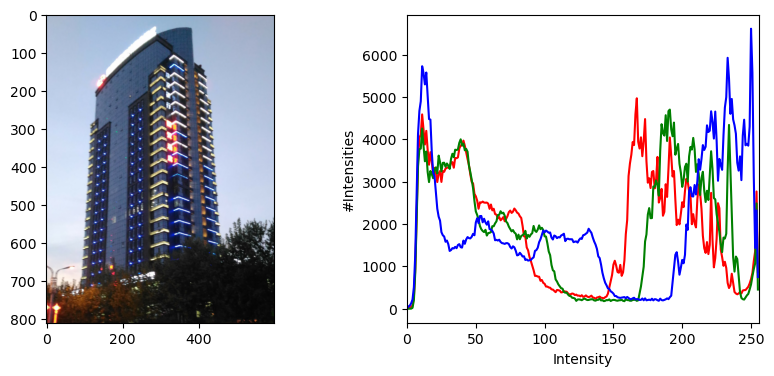

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram( f ):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(f,cmap=plt.cm.gray)
    plt.subplot(1,2,2)
    if f.ndim != 3:
        hist = cv2.calcHist( [f], [0], None, [256], [0,256] )
        plt.plot( hist )
    else:
        color = ( 'r', 'g', 'b' )
        for i, col in enumerate( color ):
            hist = cv2.calcHist( [f], [i], None, [256], [0,256] )
            plt.plot( hist, color = col)
            plt.xlim( [0,256] )
    plt.xlabel( "Intensity" )
    plt.ylabel( "#Intensities" )
    plt.show( )

def main( ):
#    img = cv2.imread( "Indoor_Over_Exposure.bmp", -1 )
    imgBGR = cv2.imread( "Building.bmp", -1 )
    img = imgBGR[:,:,::-1]
    histogram( img )

main( )

## <font color="Red"> 3.6 Histogram     
<font color="Red"> Subprogram uses cv2.calcHist to calculate image Histogram, returns image Histogram, and display Histogram in main()       

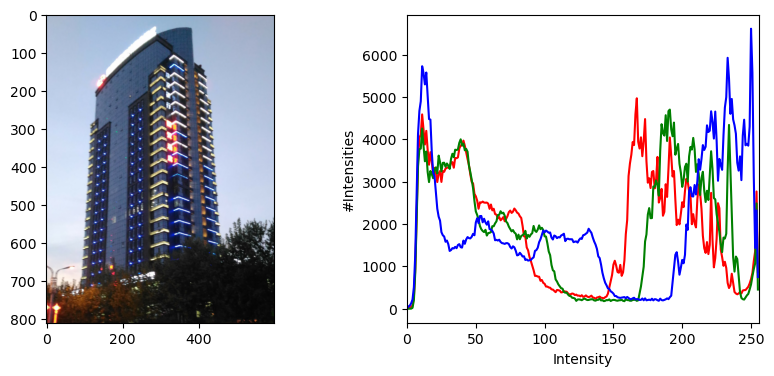

In [ ]:
# import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram( f ):
#-------------------- Code Here  -------------------#
    if f.ndim != 3:
          hist =np.zeros([256],dtype= 'int16')
          hist = cv2.calcHist( [f], [0], None, [256], [0,256] )
    else:
      hist = np.zeros([256,3],dtype= 'int16')
      color = ( 'r', 'g', 'b' )
      for i ,col in enumerate( color ):
          hist[:,i] = cv2.calcHist( [f], [i], None, [256], [0,256] ).reshape(256)
#-------------------- Stop Here  -------------------#
    return hist

def main( ):
#    img = cv2.imread( "Indoor_Over_Exposure.bmp", -1 )
    imgBGR = cv2.imread( "Building.bmp", -1 )
    img = imgBGR[:,:,::-1]
    hist = histogram( img )

#    print(hist)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)

    if img.ndim == 2:
        plt.plot( hist )
    else:
        color = ( 'r', 'g', 'b' )
        for i, col in enumerate( color ):
            plt.plot( hist[:,i], color = col)
            plt.xlim( [0,256] )
    plt.xlabel( "Intensity" )
    plt.ylabel( "#Intensities" )
    plt.show( )

main( )

## <font color="Red">3.7 Image Histogram</font>
<font color="Red"> Finish image histogram (myHistogram) subprogram with following requirements:   
<font color="Red"> 1. Use for-loop (no OpenCV) to calculate Histogram from pixel colors      
2. Subprogram returns image Histogram     
3. Display Histogram in main()     

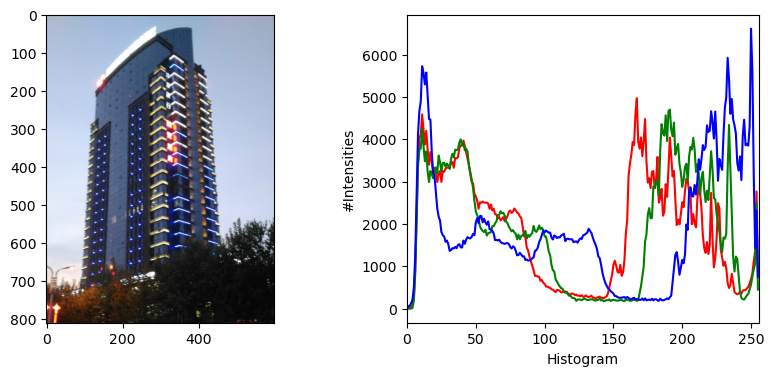

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def myHistogram( f ):
#-------------------- Code Here  -------------------#
    nr , nc = f.shape[:2]
    if f.ndim == 2:
        hist = np.zeros([256], dtype = 'int16')
        for i in range(nr):
            for j in range(nc):
                hist[f[i,j]] = hist[f[i,j]] + 1
    else:
        hist = np.zeros([256, 3], dtype = 'int16')
        for i in range(nr):
            for j in range(nc):
                for k in range(3):
                    hist[f[i,j,k], k] = hist[f[i,j,k], k] + 1
#-------------------- Stop Here  -------------------#
    return hist

def main( ):
    imgBGR = cv2.imread( "Building.bmp", -1 )
    img = imgBGR[:,:,::-1]
    hist = myHistogram( img )

#    print(hist)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    nr, nc = img.shape[:2]

    if img.ndim == 2:
        plt.plot( hist )
    else:
        color = ( 'r', 'g', 'b' )
        for i, col in enumerate( color ):
            plt.plot( hist[:,i], color = col)
            plt.xlim( [0,256] )

    plt.xlabel( "Histogram" )
    plt.ylabel( "#Intensities" )
    plt.show( )

main( )

## 3.8 Histogram Equalization

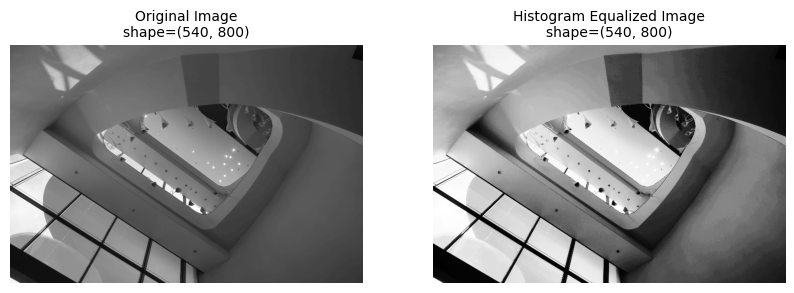

In [ ]:
import numpy as np
import cv2

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)


img = cv2.imread( "Indoor_Over_Exposure.bmp", -1 )
img2 = cv2.equalizeHist( img )

display_fig_names = [
"Original Image\nshape={}".format(img.shape),
"Histogram Equalized Image\nshape={}".format(img2.shape),
]
display_img = [img, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## <font color="Red">3.9 Homework Image Equalization</font>
<font color="Red"> Finish image equalization (myEqualization) by your histogram subprogram with following requirements:   
<font color="Red"> 1. Use myHistogram in 3.7 calculate image Histogram          
2. cdf can be done by using np.cumsum()      
3. Subprogram returns cdf, cdf_equlization, andf_equ    
4. Display image, cdf, cdf_equlization, quantized image in main()       

<a href="https://en.wikipedia.org/wiki/Histogram_equalization"> Wiki: Histogram equalization 直方圖均衡 </a>
    

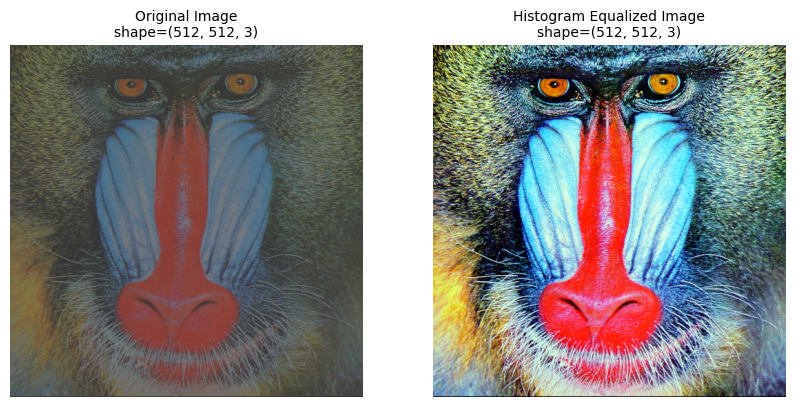

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def myHistogram( f ):
#-------------------- Code Here  -------------------#
    nr , nc = f.shape[:2]
    if f.ndim == 2:
        hist = np.zeros([256], dtype = 'int16')
        for i in range(nr):
            for j in range(nc):
                hist[f[i,j]] = hist[f[i,j]] + 1
    else:
        hist = np.zeros([256, 3], dtype = 'int16')
        for i in range(nr):
            for j in range(nc):
                for k in range(3):
                    hist[f[i,j,k], k] = hist[f[i,j,k], k] + 1
#-------------------- Stop Here  -------------------#
    return hist

def Hist_Equalization(f):
#-------------------- Code Here  -------------------#
    nr, nc = f.shape[:2]
    hist = myHistogram( f )
    hist = hist / (nr * nc)
    cdf = np.cumsum( hist )
    f_equ = f.copy()
    if f.ndim == 2:
        for i in range(nr):
            for j in range(nc):
                f_equ[i,j] = 255 * cdf[f[i,j]]
    else:
        for i in range(nr):
            for j in range(nc):
                for k in range(3):
                    f_equ[i,j,k] = 255 * cdf[f[i,j,k]]
#-------------------- Stop Here  -------------------#
    return f_equ

def main( ):
    imgBGR = cv2.imread( "Baboon_dark.bmp", -1 )
    img = imgBGR[:,:,::-1]
    img_equ = Hist_Equalization( img )

    display_fig_names = [
    "Original Image\nshape={}".format(img.shape),
    "Histogram Equalized Image\nshape={}".format(img_equ.shape),
    ]
    display_img = [img, img_equ]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

## 3.10 1-D Convolution

In [ ]:
import numpy as np

x = np.array( [ 1, 2, 4, 3, 2, 1, 1 ] )
h = np.array( [ 1, 2, 3, 1, 1 ] )
y = np.convolve( x, h, 'full' )
y1 = np.convolve( x, h, 'same' )
print( "x =", x )
print( "h =", h )
print( "Full Convolution y =", y )
print( "Convolution y =", y1 )

x = [1 2 4 3 2 1 1]
h = [1 2 3 1 1]
Full Convolution y = [ 1  4 11 18 23 20 16 10  6  2  1]
Convolution y = [11 18 23 20 16 10  6]


## 3.11 2-D Convolution

In [ ]:
import numpy as np
from scipy.signal import convolve2d

x = np.array( [ [1, 1, 1], [1, 1, 1], [1, 1, 1] ] )
h = np.array( [ [1, 2, 3], [4, 5, 6], [7, 8, 9] ] )
y = convolve2d( x, h, 'same' )
print( "x =" )
print( x )
print( "h =" )
print( h )
print( "Convolution y =" )
print( y )

x =
[[1 1 1]
 [1 1 1]
 [1 1 1]]
h =
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Convolution y =
[[12 21 16]
 [27 45 33]
 [24 39 28]]


## 3.12 Average Filtering

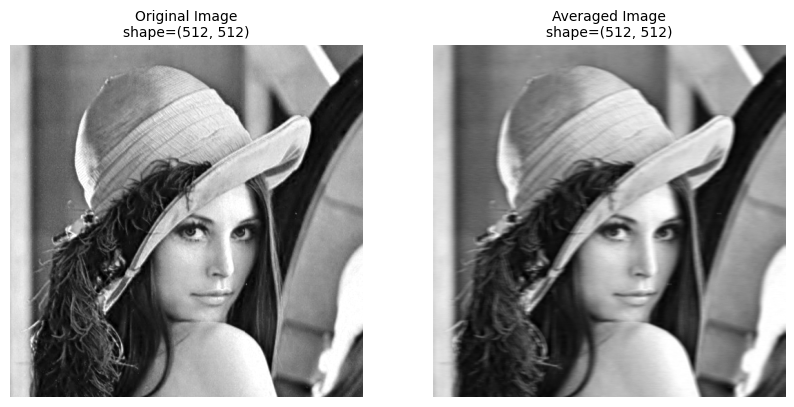

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.blur( img1, ( 7, 1 ) )

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"Averaged Image\nshape={}".format(img2.shape),
]
display_img = [img1, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## <font color="Red"> 3.13 Please write an Average Filter without using OpenCV function
<font color="Red">  input parameters including a (height) and b (width)  

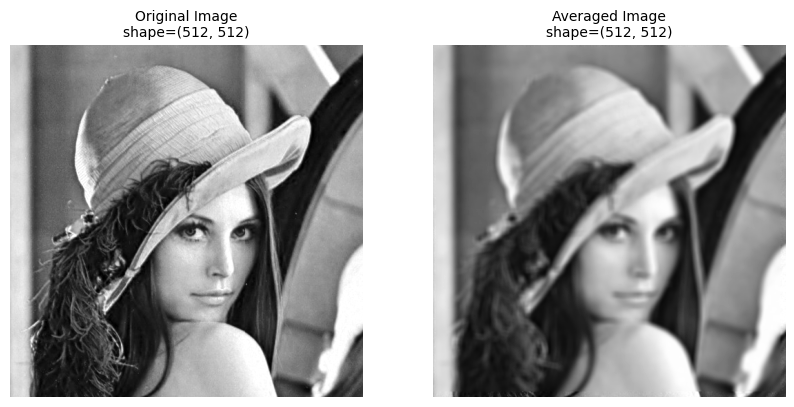

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def average( f , a, b):
    g = f.copy( )
    nr, nc = f.shape[:2]
#-------------------- Code Here  -------------------#
    for i in range(a, nr-a):
        for j in range(b, nc-b):
            g[i,j] = np.mean(f[i-a:i+a+1, j-b:j+b+1])
#-------------------- Stop Here  -------------------#
    return g

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = average( img1,9,9)

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"Averaged Image\nshape={}".format(img2.shape),
]
display_img = [img1, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## 3.14 Gaussian function
OpenCV 提供的高斯濾波器稱為 GaussianBlur   
會依據濾波器的大小，自動計算標準差

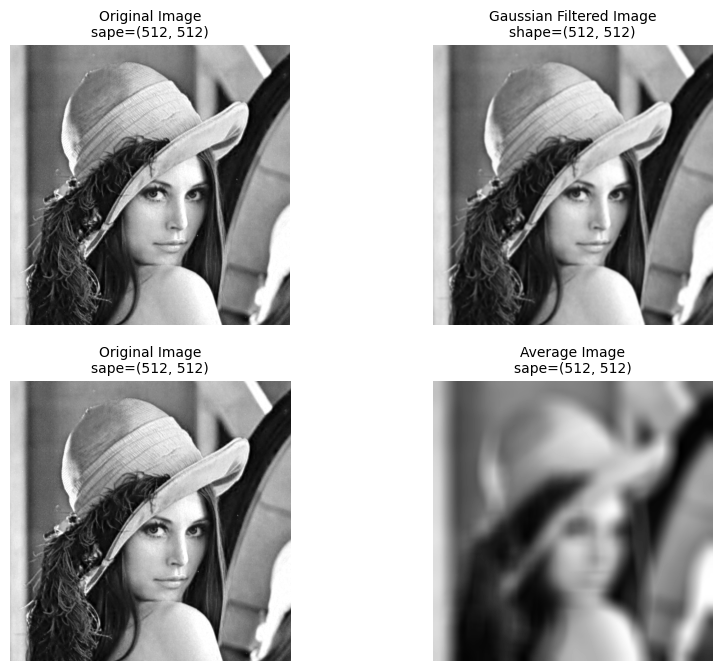

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

img1 = cv2.imread( "Lenna.bmp", -1 )
img2 = cv2.GaussianBlur( img1, ( 5, 5 ), 0 )
img3 = cv2.blur( img1, ( 33,33 ) )

display_fig_names = [
"Original Image\nsape={}".format(img1.shape),
"Gaussian Filtered Image\nshape={}".format(img2.shape),
"Original Image\nsape={}".format(img1.shape),
"Average Image\nsape={}".format(img3.shape),
]
display_img = [img1, img2, img1, img3]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(2, 2, i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## 3.15 Image Gradient

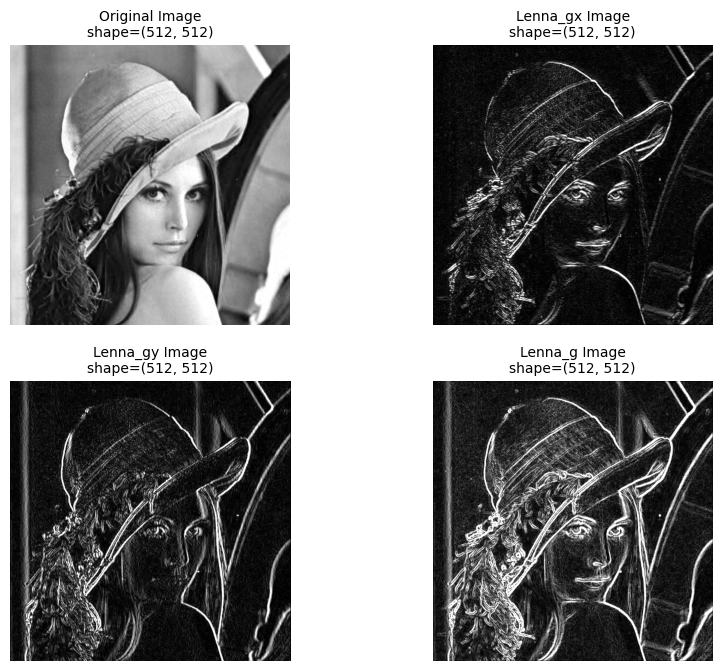

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def Sobel_gradient( f, direction = 1 ):
    sobel_x = np.array( [ [-1,-2,-1], [ 0, 0, 0], [ 1, 2, 1] ] )
    sobel_y = np.array( [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ] )
    if direction == 1:
        grad_x = cv2.filter2D( f, cv2.CV_32F, sobel_x )
        gx = abs( grad_x )
        g = np.uint8( np.clip( gx, 0, 255 ) )
    elif direction == 2:
        grad_y = cv2.filter2D( f, cv2.CV_32F, sobel_y )
        gy = abs( grad_y )
        g = np.uint8( np.clip( gy, 0, 255 ) )
    else:
        grad_x = cv2.filter2D( f, cv2.CV_32F, sobel_x )
        grad_y = cv2.filter2D( f, cv2.CV_32F, sobel_y )
        magnitude = abs( grad_x ) + abs( grad_y )
        g = np.uint8( np.clip( magnitude, 0, 255 ) )
    return g

def main( ):
    img = cv2.imread( "Lenna.bmp", -1 )
    gx  = Sobel_gradient( img, 1 )
    gy  = Sobel_gradient( img, 2 )
    g   = Sobel_gradient( img, 3 )

    display_fig_names = [
    "Original Image\nshape={}".format(img.shape),
    "Lenna_gx Image\nshape={}".format(gx.shape),
    "Lenna_gy Image\nshape={}".format(gy.shape),
    "Lenna_g Image\nshape={}".format(g.shape),
    ]
    display_img = [img, gx, gy, g]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(2, 2, i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

## <font color="Red">3.16 Image Gradient Experiments</font>

<font color="Red"> In function: Sobel_gradient, add two options    
<font color="Red"> 1. direction = 4: calculate Square Root of sum of g_x^2 and g_y^2    
<font color="Red"> 2. direction = 5: return theta    

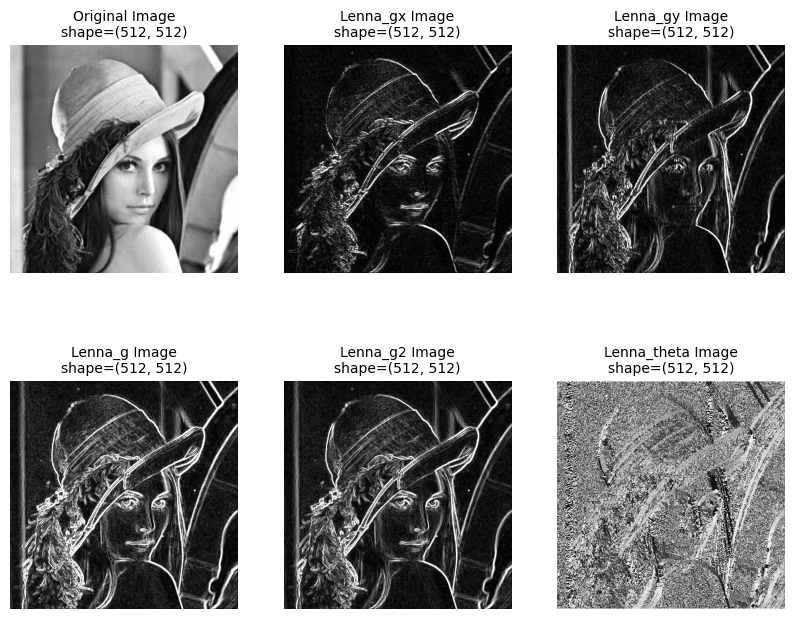

In [ ]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
PI = 3.14159

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def Sobel_gradient( f, direction = 1 ):

    sobel_x = np.array( [ [-1,-2,-1], [ 0, 0, 0], [ 1, 2, 1] ] )
    sobel_y = np.array( [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1] ] )
    if direction == 1:
        grad_x = cv2.filter2D( f, cv2.CV_32F, sobel_x )
        gx = abs( grad_x )
        g = np.uint8( np.clip( gx, 0, 255 ) )
    elif direction == 2:
        grad_y = cv2.filter2D( f, cv2.CV_32F, sobel_y )
        gy = abs( grad_y )
        g = np.uint8( np.clip( gy, 0, 255 ) )
    elif direction == 3:
        grad_x = cv2.filter2D( f, cv2.CV_32F, sobel_x )
        grad_y = cv2.filter2D( f, cv2.CV_32F, sobel_y )
        magnitude = abs( grad_x ) + abs( grad_y )
        g = np.uint8( np.clip( magnitude, 0, 255 ) )
#-------------------- Code Here  -------------------#
    elif direction == 4:
        grad_x = cv2.filter2D(f, cv2.CV_32F, sobel_x)
        grad_y = cv2.filter2D(f, cv2.CV_32F, sobel_y)
        magnitude = np.sqrt(grad_x**2 + grad_y**2)
        g = np.uint8(np.clip(magnitude, 0, 255))
    elif direction == 5:
        grad_x = cv2.filter2D(f, cv2.CV_32F, sobel_x)
        grad_y = cv2.filter2D(f, cv2.CV_32F, sobel_y)
        theta = np.arctan2(grad_y, grad_x) * 180 / np.pi
        g = np.uint8(np.clip(theta, 0, 255))
#-------------------- Stop Here  -------------------#
    return g

def main( ):
    img = cv2.imread( "Lenna.bmp", -1 )
    gx  = Sobel_gradient( img, 1 )
    gy  = Sobel_gradient( img, 2 )
    g   = Sobel_gradient( img, 3 )
    g2   = Sobel_gradient( img, 4 )
    theta   = Sobel_gradient( img, 5 )

    display_fig_names = [
    "Original Image\nshape={}".format(img.shape),
    "Lenna_gx Image\nshape={}".format(gx.shape),
    "Lenna_gy Image\nshape={}".format(gy.shape),
    "Lenna_g Image\nshape={}".format(g.shape),
    "Lenna_g2 Image\nshape={}".format(g2.shape),
    "Lenna_theta Image\nshape={}".format(theta.shape),
    ]
    display_img = [img, gx, gy, g, g2, theta]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(2, 3, i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

## 3.17 Laplacian

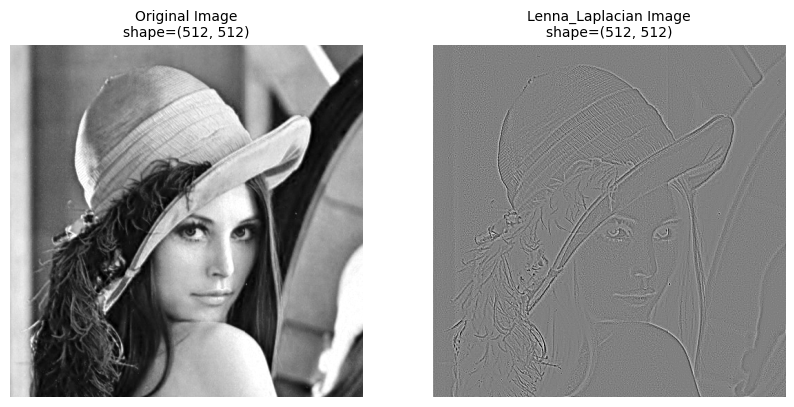

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def laplacian( f ):
    temp = cv2.Laplacian( f, cv2.CV_64F ) + 128
    g = np.uint8( np.clip( temp, 0, 255 ) )
    return g

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = laplacian( img1 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Lenna_Laplacian Image\nshape={}".format(img2.shape),
    ]
    display_img = [img1, img2]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

## <font color="Red">3.18 Laplacian Sharpening</font>
<font color="Red"> Finish MyLaplacian function with the following form options:    
<font color="Red"> 1. form = 1: Laplacian filter result       
<font color="Red"> 2. form = 2: Laplacian sharpening filter result          
<font color="Red"> 3. form = 3: second Laplacian sharpening filter result          
        
<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs11227-023-05377-y/MediaObjects/11227_2023_5377_Fig34_HTML.png" width=300>
    
<img src="https://azzlsoft.com/wp-content/uploads/2011/02/image_thumb31.png?w=183&h=185" width=200>    

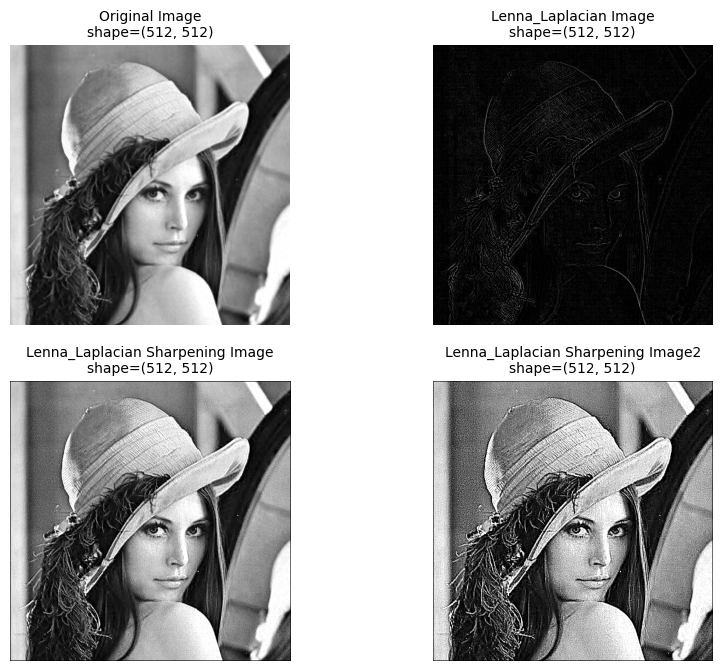

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def MyLaplacian(f, form=1):
    nr, nc = f.shape[:2]
    nd = f.ndim
#-------------------- Code Here  -------------------#
    if form == 1:
        lapla = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        lapla_reply = cv2.filter2D(f, cv2.CV_64F, lapla) + 128
    elif form == 2:
        sharp = np.array([[1, -1, 1], [-1, 5, -1], [0, -1, 0]])
        lapla_reply = cv2.filter2D(f, cv2.CV_64F, sharp) + 128
    elif form == 3:
        sec_lapla = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        lapla_reply = cv2.filter2D(f, cv2.CV_64F, sec_lapla) + 128
#-------------------- Stop Here  -------------------#
    return lapla_reply

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = 10*MyLaplacian( img1,1 )
    img3 = MyLaplacian( img1,2 )
    img4 = MyLaplacian( img1,3 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Lenna_Laplacian Image\nshape={}".format(img2.shape),
    "Lenna_Laplacian Sharpening Image\nshape={}".format(img3.shape),
    "Lenna_Laplacian Sharpening Image2\nshape={}".format(img4.shape),
    ]
    display_img = [img1, img2, img3, img4]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(2, 2, i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

## 3.19 un-sharpening

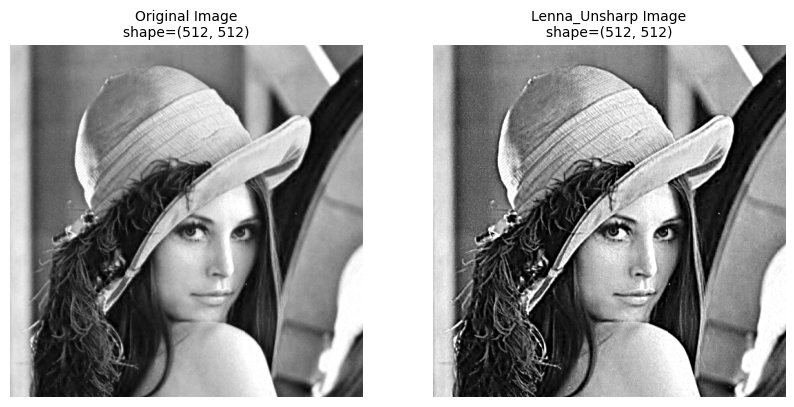

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def unsharp_masking( f, k = 1.0 ):
    g = f.copy( )
    nr, nc = f.shape[:2]
    f_avg = cv2.GaussianBlur( f, ( 15, 15 ), 0 )
    for x in range( nr ):
        for y in range( nc ):
            g_mask = int( f[x,y] ) - int( f_avg[x,y] )
            g[x,y] = np.uint8( np.clip( f[x,y] + k * g_mask, 0, 255 ) )
    return g

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = unsharp_masking( img1, 1.0 )

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Lenna_Unsharp Image\nshape={}".format(img2.shape),
    ]
    display_img = [img1, img2]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(1, len(display_img), i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

## <font color="Red">3.20 Un-sharpening Experiments</font>
<font color="Red"> Finish Un-sharpening function with the following form options:    
<font color="Red"> 1. form = 1: (cv2.GaussianBlur) nxn Gaussian Blur filter        
<font color="Red"> 2. form = 2: (cv2.blur) nxn average filter       
<font color="Red"> 3. k: degree of un-sharpening mask

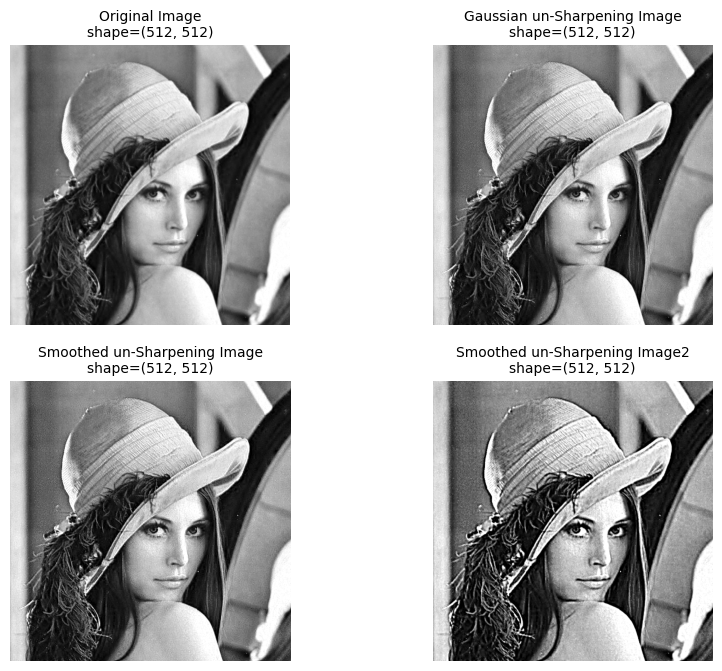

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def unsharp_masking( f, n = 3 , k = 1.0, form=1):
    g = f.copy( )
    nr, nc = f.shape[:2]
#-------------------- Code Here  -------------------#
    if form == 1:
      f_avg = cv2.GaussianBlur( f, ( n, n ), 0 )
      for x in range( nr ):
          for y in range( nc ):
              g_mask = int( f[x,y] ) - int( f_avg[x,y] )
              g[x,y] = np.uint8( np.clip( f[x,y] + k * g_mask, 0, 255 ) )
    elif form == 2:
        f_avg = cv2.blur( f, ( n, n ) )
        for x in range( nr ):
            for y in range( nc ):
                g_mask = int( f[x,y] ) - int( f_avg[x,y] )
                g[x,y] = np.uint8( np.clip( f[x,y] + k * g_mask, 0, 255 ) )
    elif form == 3:
        laplacian = cv2.Laplacian(f, cv2.CV_64F)
        for x in range(nr):
            for y in range(nc):
                g_mask = int(f[x, y]) - int(laplacian[x, y])
                g[x, y] = np.uint8(np.clip(f[x, y] + k * g_mask, 0, 255))

#-------------------- Stop Here  -------------------#
    return g

def main( ):
    img1 = cv2.imread( "Lenna.bmp", -1 )
    img2 = unsharp_masking( img1, 3, 2.0, 1)
    img3 = unsharp_masking( img1, 3, 2.0, 2)
    img4 = unsharp_masking( img1, 9, 2.0, 2)

    display_fig_names = [
    "Original Image\nshape={}".format(img1.shape),
    "Gaussian un-Sharpening Image\nshape={}".format(img2.shape),
    "Smoothed un-Sharpening Image\nshape={}".format(img3.shape),
    "Smoothed un-Sharpening Image2\nshape={}".format(img4.shape),
    ]
    display_img = [img1, img2, img3, img4]
    display_fig = plt.figure(figsize=(10, 8))

    for i in range(len(display_img)):
        display_fig.add_subplot(2, 2, i+1)
        plot_image(display_img[i], title=display_fig_names[i])

main( )

## 3.21 salt-and-pepper noise

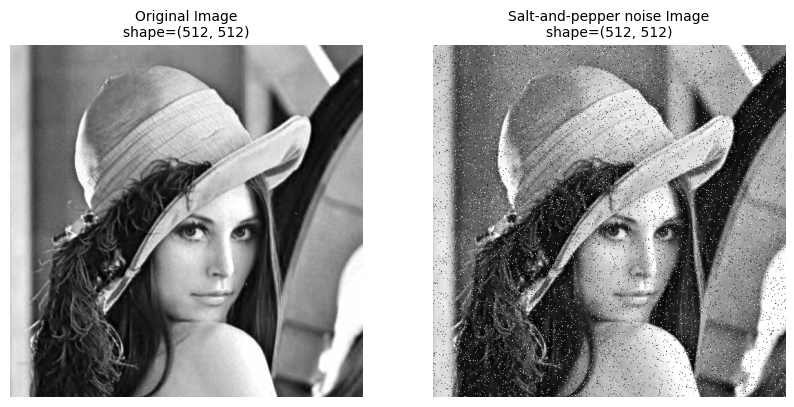

In [ ]:
import random
import cv2
import matplotlib.pyplot as plt

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output


img = cv2.imread('Lenna.bmp', cv2.IMREAD_GRAYSCALE)
img2 = sp_noise(img,0.05)

display_fig_names = [
"Original Image\nshape={}".format(img1.shape),
"Salt-and-pepper noise Image\nshape={}".format(img2.shape),
]
display_img = [img1, img2]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])

## <font color="Red">3.22 Median filter</font>
<font color="Red">Please design a Python program to acquire median fiter results of 3.21<p>

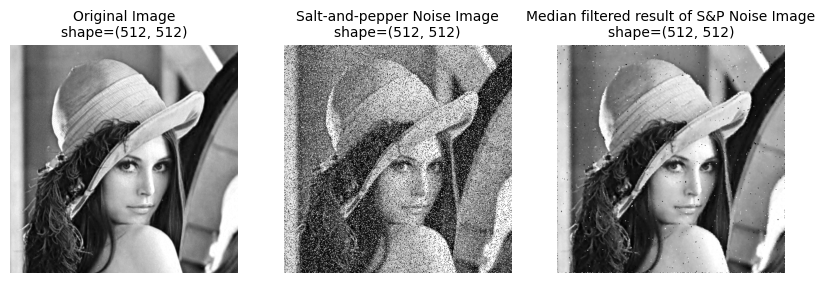

In [ ]:
import cv2
import numpy as np

def plot_image(img, title=None, font_size=None, axis="off"):
    plt.title(title, fontsize=font_size) # plot figure + title
    plt.axis(axis) # remove axes
    if img.ndim == 3:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=plt.cm.gray)

def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    nr, nc = image.shape[:2]
    if image.ndim == 2:
        black = 0
        white = 255
    else:
        black = np.array([0, 0, 0], dtype='uint8')
        white = np.array([255, 255, 255], dtype='uint8')

    for i in range(nr):
        for j in range(nc):
            ran = np.random.random()
            if ran < (prob / 2):
                output[i,j] = black
            elif ran > (1-(prob / 2)):
                output[i,j] = white
    return output

def median_filter(image):
    nr, nc = img2.shape[:2]
    median_image = image.copy()
#-------------------- Code Here  -------------------#
    for i in range(1, nr-1):
      for j in range(1, nc-1):
          if image.ndim == 2:
              median_image[i,j] = np.median(image[i-1:i+2, j-1:j+2])
          else:
              for k in range(3):
                  median_image[i,j,k] = np.median(image[i-1:i+2, j-1:j+2, k])
#-------------------- Stop Here  -------------------#
    return median_image

img = cv2.imread('Lenna.bmp', cv2.IMREAD_GRAYSCALE)
img2 = sp_noise(img,0.25)
img3 = median_filter(img2)

display_fig_names = [
"Original Image\nshape={}".format(img.shape),
"Salt-and-pepper Noise Image\nshape={}".format(img2.shape),
"Median filtered result of S&P Noise Image\nshape={}".format(img3.shape),
]
display_img = [img, img2, img3]
display_fig = plt.figure(figsize=(10, 8))

for i in range(len(display_img)):
    display_fig.add_subplot(1, len(display_img), i+1)
    plot_image(display_img[i], title=display_fig_names[i])